## Market Basket Analysis: Uncovering Patterns in Customer Purchasing Behavior

This analysis aims to identify patterns in customer purchasing behavior to make informed decisions for improving sales and customer satisfaction. The analysis will be carried out using Association rules and the Apriori algorithm.

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")

In [10]:
# checking for dataset shape and info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [11]:
# checking basic statistics of dataset
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [12]:
#Checking for null values to determine datacleaning steps. '0' values shows data has no null values

df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [13]:
#converting date datatype to datetime

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')


In [14]:
#checking to see the datetime conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [15]:
# converting the data into a format that will easily be ingested in the Alpriori algorithm

df['single_transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)


df.head()

,Member_number,Date,itemDescription,single_transaction
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [16]:
#pivoting the table to convert items into columns and transactions into rows

df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])
df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#installing libraries for associstion rule and encoding

!pip install mlxtend

In [18]:
#encoding values to 0 and 1

def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)

In [22]:
#importing apriori from mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

C:\Users\akinj\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(sausage),(UHT-milk),0.060349,0.021386,0.001136,0.018826,0.880298,-0.000154,0.997391,-0.126418


## Exploratory Data Analysis

### Question 
Which products are the most popular?

In [23]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head

<bound method NDFrame.head of             antecedents            consequents  antecedent support  \
623        (rolls/buns)           (whole milk)            0.110005   
622        (whole milk)           (rolls/buns)            0.157923   
695            (yogurt)           (whole milk)            0.085879   
694        (whole milk)               (yogurt)            0.157923   
551              (soda)     (other vegetables)            0.097106   
..                  ...                    ...                 ...   
304        (rolls/buns)            (detergent)            0.110005   
616        (rolls/buns)          (soft cheese)            0.110005   
537  (other vegetables)           (pot plants)            0.122101   
544  (other vegetables)  (semi-finished bread)            0.122101   
599        (whole milk)           (pot plants)            0.157923   

     consequent support   support  confidence      lift  leverage  conviction  \
623            0.157923  0.013968    0.126974  0

Text(0, 0.5, 'Itemsets')

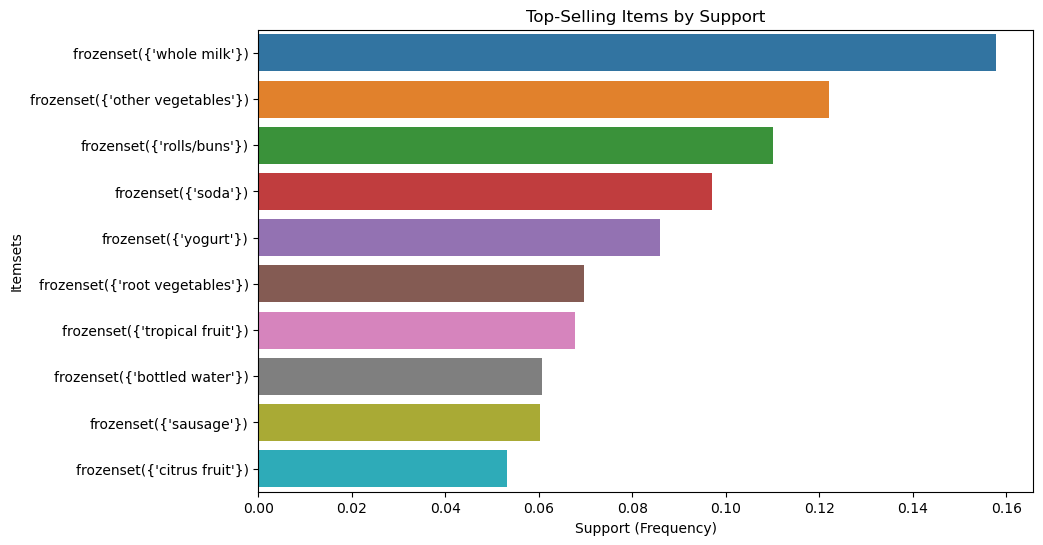

In [24]:
top_items = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_items)
plt.title('Top-Selling Items by Support')
plt.xlabel('Support (Frequency)')
plt.ylabel('Itemsets')


This shows that frozen set(whole milk) are the most widely sold products,

### Question
What products are frequently bought together?

Text(0, 0.5, 'Antecedents')

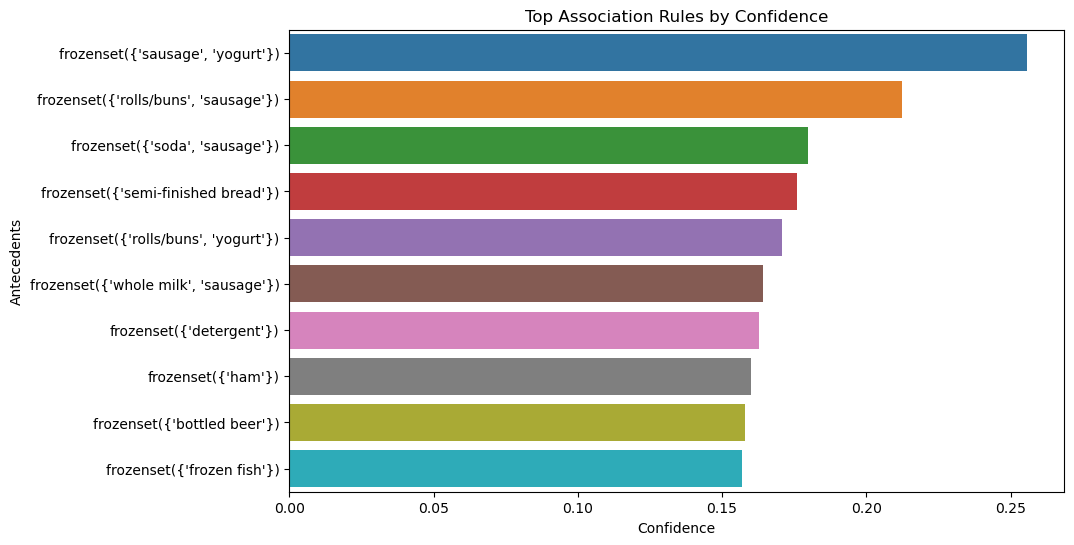

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='confidence', y='antecedents', data=rules.nlargest(10, 'confidence'))
plt.title('Top Association Rules by Confidence')
plt.xlabel('Confidence')
plt.ylabel('Antecedents')


Sausages and yoghurt are the top frequently bought together goods followed by rolls/buns and yoghurt and soda/sausage.

### Question

How do the relationships between different items compare?

Text(0.5, 1.0, 'Association Rules Heatmap')

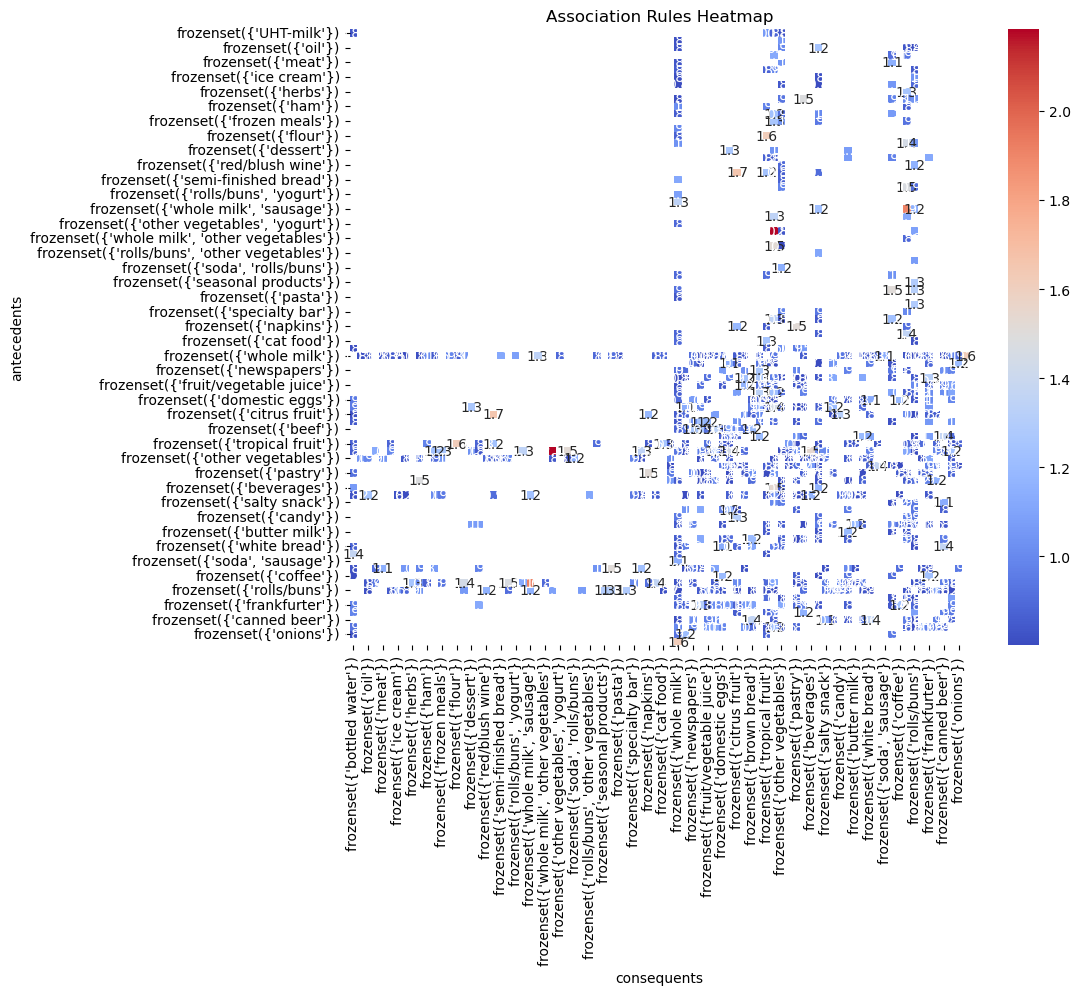

In [18]:
association_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 8))
sns.heatmap(association_matrix, annot=True, cmap='coolwarm')
plt.title('Association Rules Heatmap')


The heat map shows the strongly correlated items (red bar) compared to the least coreellated items (blue bars)

### Question

What are the top 5 selling products?

In [20]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install Pillow==8.2.0


Note: you may need to restart the kernel to use updated packages.


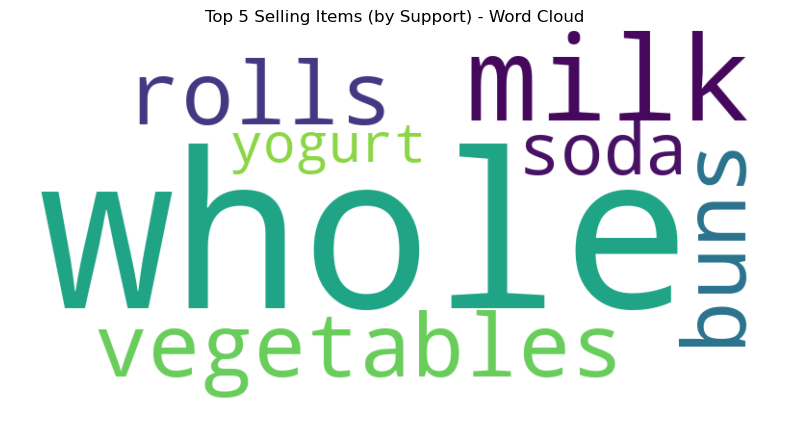

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of top 5 selling items
top_items = ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt']

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_items))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 5 Selling Items (by Support) - Word Cloud')
plt.show()


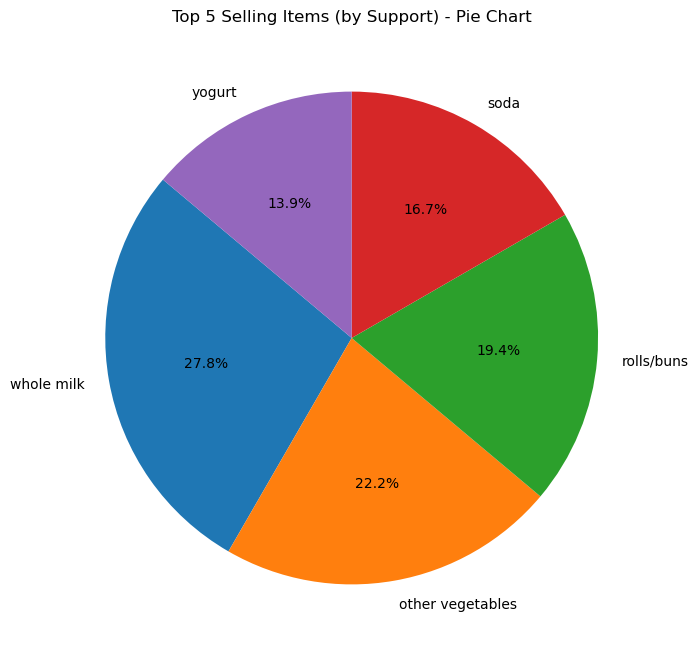

In [6]:
import matplotlib.pyplot as plt

# Data for the top 5 selling items
item_counts = {'Item': ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt'],
               'Frequency': [1000, 800, 700, 600, 500]}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(item_counts['Frequency'], labels=item_counts['Item'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Selling Items (by Support) - Pie Chart')
plt.show()


## Conclusion and Recommendation




The following conclusions and recommnedations are drawn from the observed results:

The top 5 frequently purchased items based on support were identified as **'Whole Milk,' 'Other Vegetables,' 'Rolls/Buns,' 'Soda,' and 'Yogurt.**' while specific combinations such as **'Whole Milk' and 'Rolls/Buns'** were found to have a high association.

These results show our customers preferences and understanding these associations allow for targeted promotions and bundled product offerings which will help to optimize sales.

### Recommendations:


**Targeted Promotions**: Our product owner can implement targeted promotions or discounts for the frequently associated products such as Whole milk and Rolls/buns to encourage customers to buy them together.

**Optimized Shelf Placement**: The placement of associated products together on shelves to enhance visibility and increase the likelihood of joint purchases can also be exploited.

### Conclusion

The basket analysis provides valuable insights into customer behavior, allowing the dataset owner (company) to make data-driven decisions to enhance sales and customer satisfaction. By understanding product associations, targeted strategies can be implemented to meet customer preferences effectively.